# Tarea 3.2 - Parcial 3

In [33]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.io
import networkx as nx

In [4]:
path = r"C:\Users\holai\OneDrive\Escritorio\Semestre 5\Modelos Computacionales I\modelos-computacionales-I\Parcial 3\fve32.mat"
fve32 = scipy.io.loadmat(path)

## 2. Ejercicios fve32

In [7]:
print(fve32.keys())

dict_keys(['__header__', '__version__', '__globals__', 'Names', 'CIJ'])


1. Muestra el heatmap de la matriz de activación

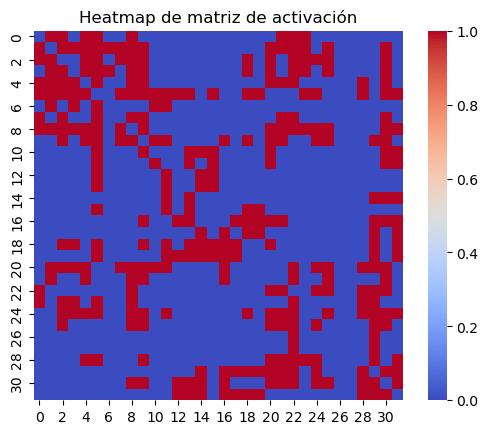

In [10]:
activation_matrix = fve32['CIJ']
sns.heatmap(activation_matrix, cmap='coolwarm', cbar=True, square=True)
plt.title("Heatmap de matriz de activación")
plt.show()

2. Utilizando los nombres del archivo .mat, muestra el grafo en 4 formas distintas (shell debe ser una de ellas)

In [13]:
G = nx.from_numpy_array(activation_matrix)
names = fve32['Names'].flatten()
G = nx.relabel_nodes(G, {i: name for i, name in enumerate(names)})

2.1. Layout Circular

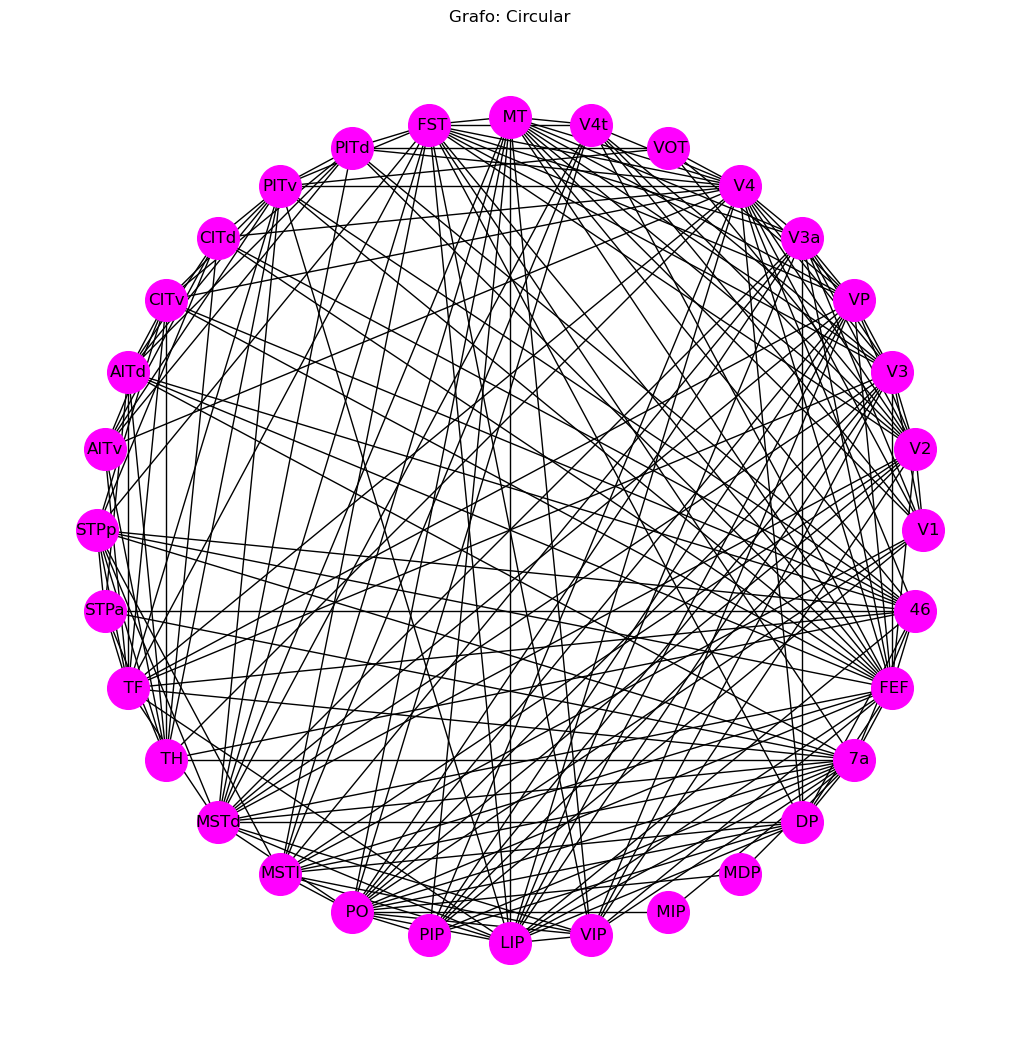

In [16]:
plt.figure(figsize=(10, 10))
circular = nx.circular_layout(G)
nx.draw(G, pos=circular, with_labels=True, node_size=900, node_color='magenta')
plt.title("Grafo: Circular")
plt.show()

2.2. Layout Spring

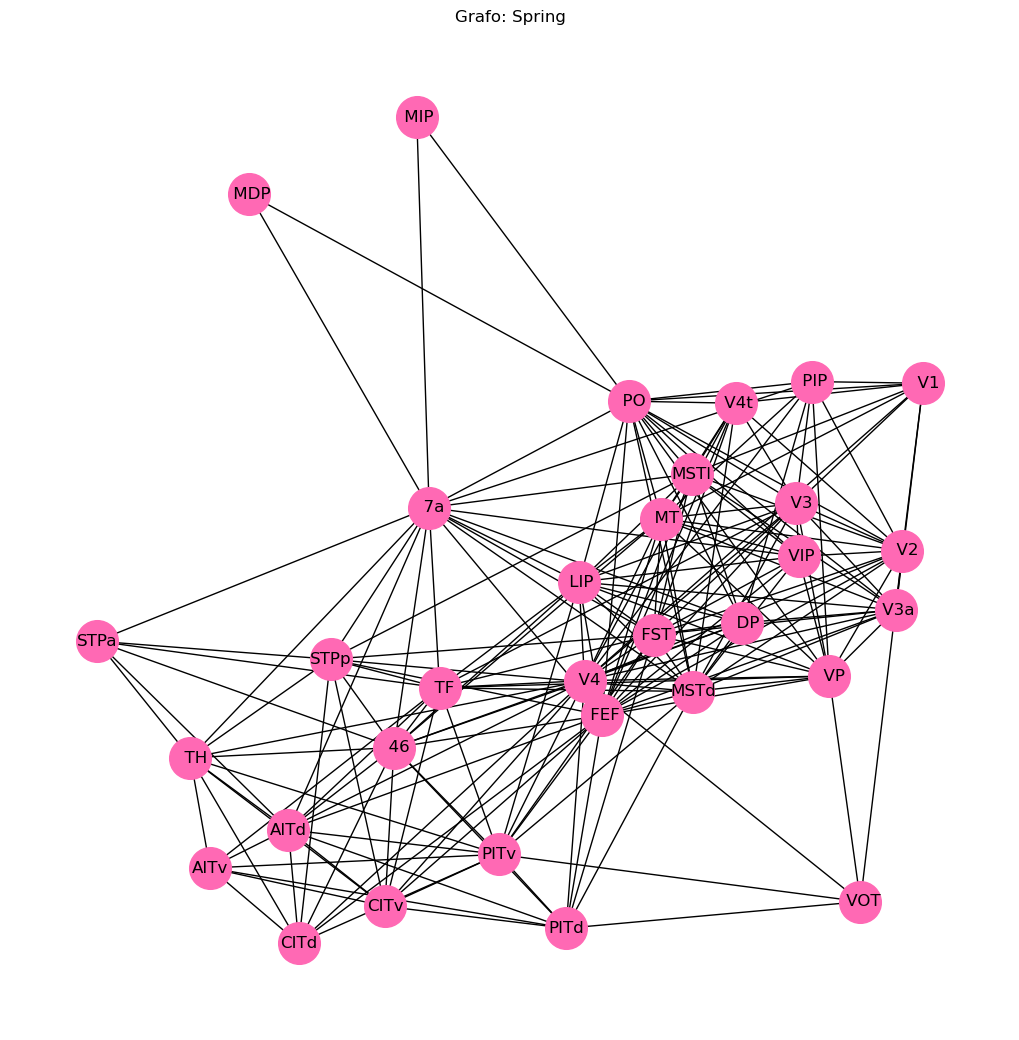

In [19]:
plt.figure(figsize=(10, 10))
pos_spring = nx.spring_layout(G)  
nx.draw(G, pos=pos_spring, with_labels=True, node_size=900, node_color='hotpink')
plt.title("Grafo: Spring")
plt.show()

2.3. Layout Kamada-Kawai

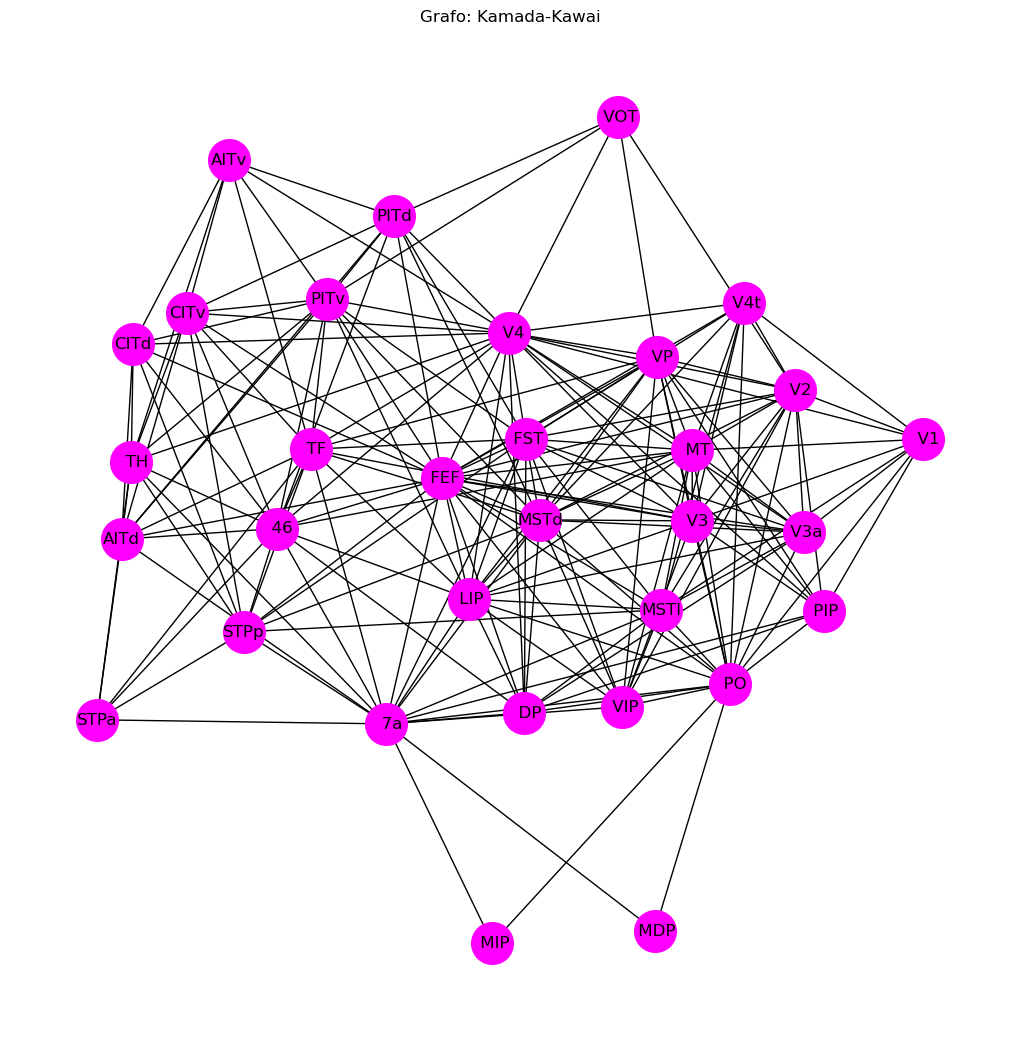

In [22]:
plt.figure(figsize=(10, 10))
pos_kamada_kawai = nx.kamada_kawai_layout(G)  # Layout de Kamada-Kawai
nx.draw(G, pos=pos_kamada_kawai, with_labels=True, node_size=900, node_color='fuchsia')
plt.title("Grafo: Kamada-Kawai")
plt.show()

2.4. Layout Aleatorio

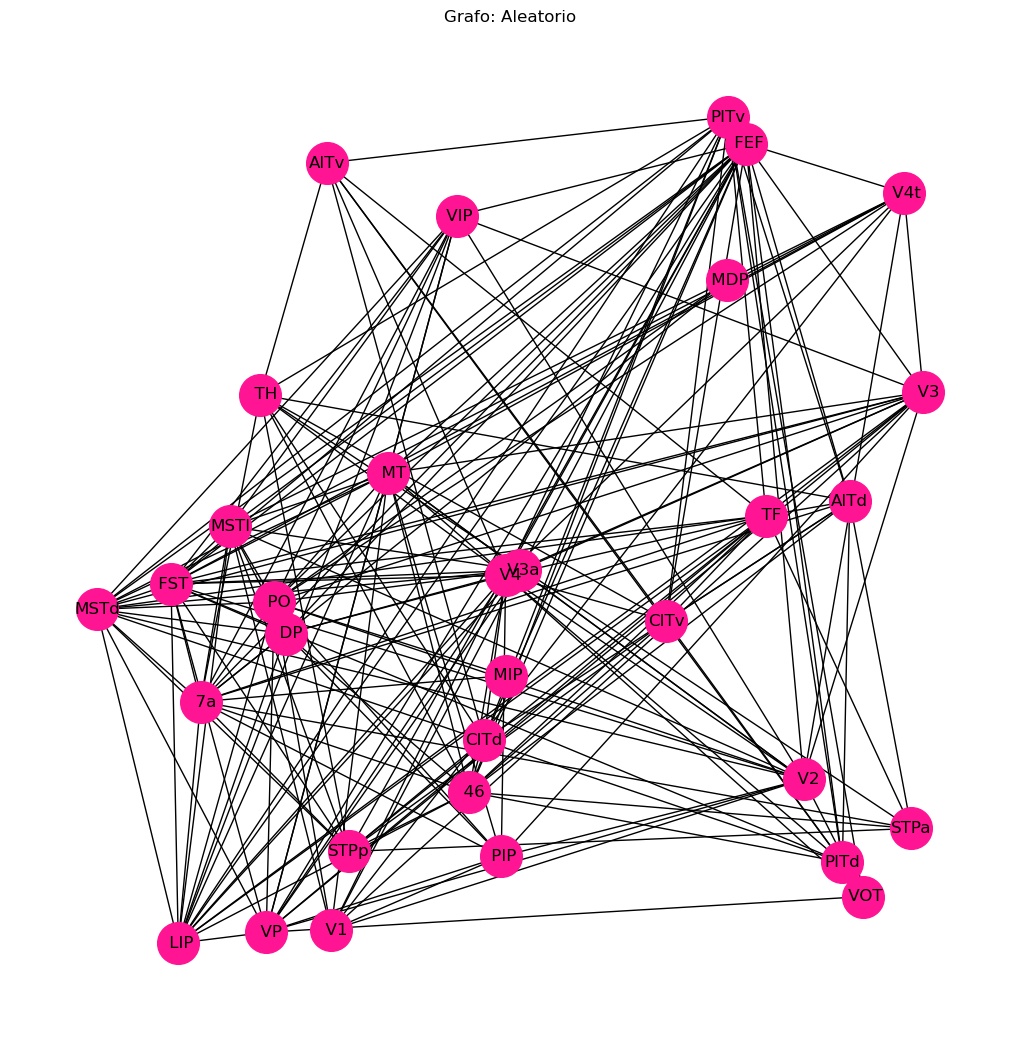

In [25]:
plt.figure(figsize=(10, 10))
pos_random = nx.random_layout(G)
nx.draw(G, pos=pos_random, with_labels=True, node_size=900, node_color='deeppink')
plt.title("Grafo: Aleatorio")
plt.show()

3. Determina el nodo con mayores conexiones

In [28]:
degree = dict(G.degree())
max_degree_node = max(degree, key=degree.get)
max_degree = degree[max_degree_node]
print(f'El nodo con mayor número de conexiones es: {max_degree_node} con {max_degree} conexiones.')

El nodo con mayor número de conexiones es:  FEF con 22 conexiones.


4. Muestra el grado solo destacando las conexiones del nodo encontrado en el ejercicio anterior

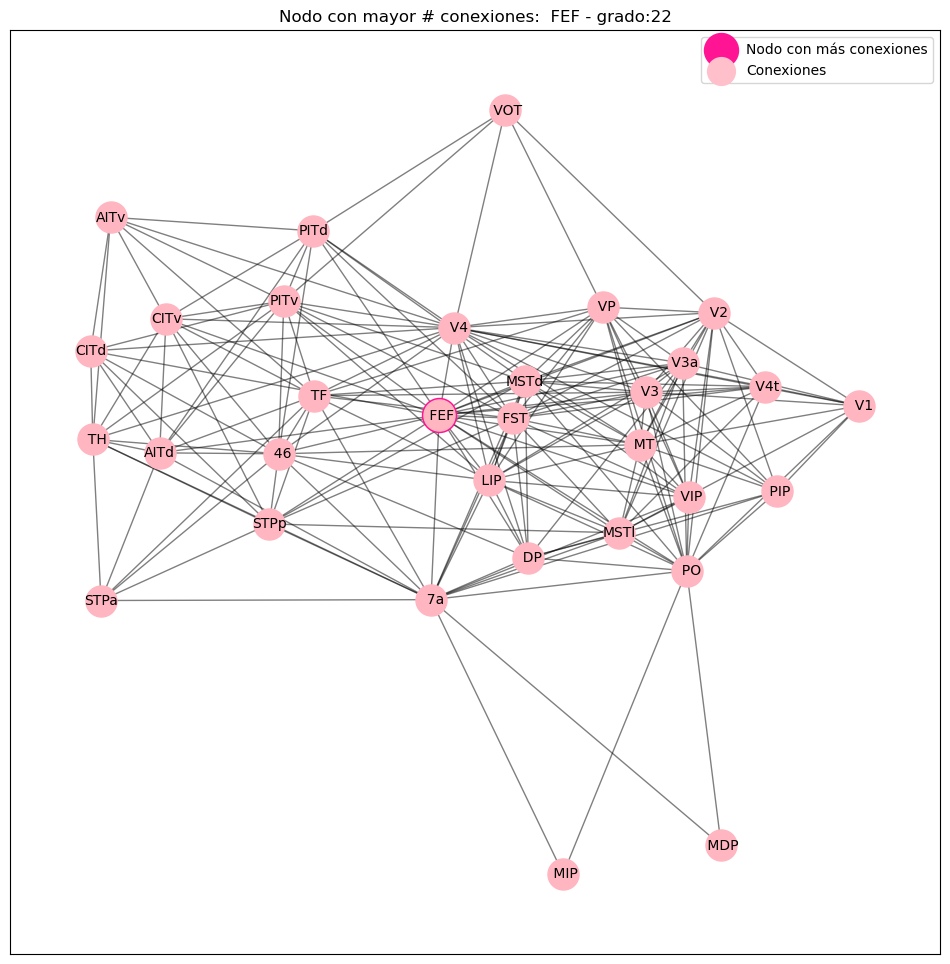

In [31]:
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G)
nx.draw_networkx_edges(G, pos, alpha=0.5)
nx.draw_networkx_nodes(G, pos, nodelist=[max_degree_node], node_color='deeppink', node_size=600, label='Nodo con más conexiones')
nx.draw_networkx_nodes(G, pos, nodelist=list(G.neighbors(max_degree_node)), node_color='pink', node_size=400, label='Conexiones')
nx.draw_networkx_nodes(G, pos, nodelist=list(G.nodes()), node_color='lightpink', node_size=500)
nx.draw_networkx_labels(G, pos, font_size=10)
plt.legend()
plt.title(f'Nodo con mayor # conexiones: {max_degree_node} - grado:{max_degree}')
plt.show()